In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

import seaborn as sns
import glob


%matplotlib inline

In [161]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [203]:
y_frame.value_counts()

1    33878
2    22748
0    21169
3     2640
4     2277
5     1422
6      978
Name: tag, dtype: int64

In [186]:
path = '/Users/cmkerner/Documents/sailing_ml/data/ML Training Resources' # use your path
all_files = glob.glob(path + "/*.csv")

x_li = []
y_li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['time'] = pd.to_datetime(df['time'])
    x_li.append(df.drop(columns=['tag', 'tag_name', 'boat_class', 'time']))
    df.tag = df.tag.map({'0': '0', 'S': '1', 'C': '2', 'G': '3', 'T': '4', 'B': '5','D': '6' })
    y_li.append(df['tag'])

x_frame = pd.concat(x_li, axis=0, ignore_index=True)
y_frame = pd.concat(y_li, axis=0, ignore_index=True)
y_frame.head()


0    1
1    1
2    1
3    1
4    1
Name: tag, dtype: object

In [188]:
x_seq = []
y_seq = []
for i in range(len(x_li)):
    rows = len(x_li[i])
    chunks = (rows//1000)
    for j in range(chunks):
        start = j*1000
        stop = min((j+1)*1000, rows)
        x_temp = x_li[i].iloc[start:stop]
        y_temp = y_li[i].iloc[start:stop]
        x_seq.append(x_temp)
        y_seq.append(y_temp)

In [189]:
items = len(x_seq)
print(items)

74


In [190]:
x_train = []
x_val = []
x_test = []

x_train = x_seq[:48]
x_val = x_seq[48:62]
x_test = x_seq[62:]

y_train = y_seq[:48]
y_val = y_seq[48:62]
y_test = y_seq[62:]

In [195]:
y_test = np.stack(y_test)
x_test = np.stack(x_test)

In [191]:
x_train = np.stack(x_train)
x_val = np.stack(x_val)

y_train = np.stack(y_train)
y_val = np.stack(y_val)

In [88]:
##preprocessing
#Padding the sequence with the values in last row to max length
# to_pad = 1000
# x_seq = []
# y_seq = []
# for one_seq in seq:
#     if(len(one_seq)==1000):
#         y_seq.append(one_seq['tag'].values)
#         x_seq.append(one_seq.drop(columns=['tag', 'tag_name', 'boat_class']))
        
# final_seq = np.stack(new_seq)

# #truncate the sequence to length 60
# from keras.preprocessing import sequence
# seq_len = 60
# final_seq=sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')

In [19]:
martine = frame.loc[frame.boat_class == "Martine"]

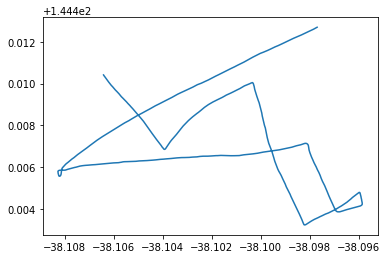

In [216]:
plt.plot(x_seq[2].lat, x_seq[2].lon)

In [192]:
##Supervised
seq_len = 1000
model = Sequential()
model.add(LSTM(256, input_shape=(seq_len, 8)))
model.add(Dense(1000, activation='sigmoid'))

In [193]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 256)               271360    
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              257000    
Total params: 528,360
Trainable params: 528,360
Non-trainable params: 0
_________________________________________________________________


In [194]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=200, batch_size=128, callbacks=[chk], validation_data=(x_val,y_val))

Train on 48 samples, validate on 14 samples
Epoch 1/200
48/48 [==============================] - 4s 73ms/step - loss: nan - accuracy: 0.2324 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/200


/Users/cmkerner/Google Drive/deepfake/detectors/DSP-FWA/FWA_env/lib/python3.6/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


48/48 [==============================] - 2s 38ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/200
48/48 [==============================] - 2s 39ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/200
48/48 [==============================] - 2s 39ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/200
48/48 [==============================] - 2s 39ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/200
48/48 [==============================] - 2s 38ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/200
48/48 [==============================] - 2s 39ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 8/200
48/48 [==============================] - 2s 39ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoc

Epoch 59/200
48/48 [==============================] - 2s 41ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 60/200
48/48 [==============================] - 2s 42ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 61/200
48/48 [==============================] - 2s 45ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 62/200
48/48 [==============================] - 2s 42ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 63/200
48/48 [==============================] - 2s 45ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 64/200
48/48 [==============================] - 2s 48ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 65/200
48/48 [==============================] - 2s 43ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accura

Epoch 116/200
48/48 [==============================] - 2s 47ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 117/200
48/48 [==============================] - 2s 41ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 118/200
48/48 [==============================] - 2s 40ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 119/200
48/48 [==============================] - 2s 41ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 120/200
48/48 [==============================] - 2s 41ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 121/200
48/48 [==============================] - 2s 41ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 122/200
48/48 [==============================] - 2s 39ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val

Epoch 173/200
48/48 [==============================] - 2s 39ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 174/200
48/48 [==============================] - 2s 40ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 175/200
48/48 [==============================] - 2s 42ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 176/200
48/48 [==============================] - 2s 43ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 177/200
48/48 [==============================] - 2s 45ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 178/200
48/48 [==============================] - 2s 41ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 179/200
48/48 [==============================] - 2s 44ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val

In [198]:
from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(x_test)
# accuracy_score(y_test, test_preds)

In [201]:
x_test[0]

array([[54.441268, 10.201303, 15.21    , ...,  0.      ,  0.      ,
         0.      ],
       [54.441295, 10.201198, 14.08    , ...,  0.      ,  0.      ,
         0.      ],
       [54.441323, 10.201102, 13.55    , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [54.438172, 10.192735, 13.49    , ...,  0.      ,  0.      ,
         0.      ],
       [54.438122, 10.19268 , 13.      , ...,  0.      ,  0.      ,
         0.      ],
       [54.438074, 10.192626, 12.25    , ...,  0.      ,  0.      ,
         0.      ]])